right now, this compares 9 channel CNN vs. GLMs, in terms of raw performance (cc^2 or cc), on ALL neurons (so no subset stuff yet)

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
from collections import OrderedDict
from itertools import product
import h5py
import numpy as np
import pandas as pd

In [3]:
from tang_jcompneuro.model_fitting_postprocess import load_model_performance

In [4]:
def check_all():
    subsets_to_check = ('all',
#                         'OT'
                       )
    datasets_to_check = ('MkA_Shape',
#                          'MkE2_Shape'
                        )
    
    models_to_examine = [
        ('cnn', 'b.9'),
        ('cnn', 'b.9_avg'),
        ('cnn', 'b.9_halfsq'),
        ('cnn', 'b.9_avg_halfsq'),
        ('cnn', 'b.9_sq'),
        ('cnn', 'b.9_avg_sq'),
        ('cnn', 'b.9_linear'),
        ('cnn', 'b.9_avg_linear'),
        ('cnn', 'b.9@0.05'),
        ('cnn', 'b.9_avg@0.05'),
        ('cnn', 'b.9_halfsq@0.05'),
        ('cnn', 'b.9_avg_halfsq@0.05'),
        ('cnn', 'b.9_sq@0.05'),
        ('cnn', 'b.9_avg_sq@0.05'),
        ('cnn', 'b.9_linear@0.05'),
        ('cnn', 'b.9_avg_linear@0.05'),
        ('cnn', 'b.9_avg_abs@0.05'),
        ('cnn', 'b.9_abs@0.05'),
        ('cnn', 'b.9@0.005'),
        ('cnn', 'b.9_avg@0.005'),
        ('cnn', 'b.9_halfsq@0.005'),
        ('cnn', 'b.9_avg_halfsq@0.005'),
        ('cnn', 'b.9_sq@0.005'),
        ('cnn', 'b.9_avg_sq@0.005'),
        ('cnn', 'b.9_linear@0.005'),
        ('cnn', 'b.9_avg_linear@0.005'),
        ('cnn', 'b.9_avg_abs@0.005'),
        ('cnn', 'b.9_abs@0.005'),
    ] # TODO should make this a ordered dict.
      # so that it will be easier to collect best val model for each model class.
    
    score_all = []
    for dataset, subset in product(datasets_to_check, subsets_to_check):
        
        print(dataset, subset)
        for (model_type, model_subtype) in models_to_examine: 
            score_new_cc = np.asarray(
                [load_model_performance(dataset, subset, 100, s, model_type, model_subtype)['corr'] for s in range(1)]
            ).mean(axis=0)
            
            score_new_cc2 = np.asarray(
                [load_model_performance(dataset, subset, 100, s, model_type, model_subtype)['corr']**2 for s in range(1)]
            ).mean(axis=0)
            
            if '@' in model_subtype:
                model_subtype_base, hack_ratio = model_subtype.split('@')
                hack_ratio = float(hack_ratio)
            else:
                model_subtype_base= model_subtype
                hack_ratio = 1
            
            score_all.append({
                'dataset': dataset,
                'subset': subset,
                'model': model_type + '_' + model_subtype_base,
                'hack_ratio': hack_ratio,
                'cc': score_new_cc.mean(),
                'cc2': score_new_cc2.mean(),
                'raw_cc': score_new_cc.copy(),
                # later on, I can add neuron subset, etc.
            })
            
    score_all = pd.DataFrame(score_all,
                             columns = ['dataset', 'subset', 'model',
                                        'hack_ratio', 'cc', 'cc2', 'raw_cc']).set_index(['dataset', 'subset', 'model', 'hack_ratio'], verify_integrity=True)
    return score_all

In [5]:
df_all = check_all()

MkA_Shape all


In [6]:
df_all.columns.name = 'metric'

In [7]:
# this is the way to change a multiindex's names.
# df_all.index.rename(['haha','haha2','haha3'], inplace=True)

In [8]:
df_to_process = df_all.unstack('subset').unstack('hack_ratio')
df_to_process = df_to_process.xs('MkA_Shape', level='dataset')
df_to_process

metric                    cc                           cc2            \
subset                   all                           all             
hack_ratio             0.005     0.050     1.000     0.005     0.050   
model                                                                  
cnn_b.9             0.437530  0.437280  0.431989  0.224587  0.224250   
cnn_b.9_abs         0.408747  0.409813       NaN  0.195714  0.196644   
cnn_b.9_avg         0.409223  0.410520  0.415106  0.199628  0.200426   
cnn_b.9_avg_abs     0.404192  0.406228       NaN  0.193608  0.194851   
cnn_b.9_avg_halfsq  0.298985  0.360939  0.412328  0.147841  0.175721   
cnn_b.9_avg_linear  0.217214  0.217195  0.218794  0.061600  0.061604   
cnn_b.9_avg_sq      0.370757  0.370887  0.381447  0.165549  0.165785   
cnn_b.9_halfsq      0.381123  0.415607  0.435485  0.190027  0.210679   
cnn_b.9_linear      0.406151  0.407646  0.401741  0.193491  0.194552   
cnn_b.9_sq          0.406649  0.408106  0.420002  0.196230  0.197225   

metric                        \
subset                         
hack_ratio             1.000   
model                          
cnn_b.9             0.220311   
cnn_b.9_abs              NaN   
cnn_b.9_avg         0.204472   
cnn_b.9_avg_abs          NaN   
cnn_b.9_avg_halfsq  0.204526   
cnn_b.9_avg_linear  0.062210   
cnn_b.9_avg_sq      0.172442   
cnn_b.9_halfsq      0.223339   
cnn_b.9_linear      0.190822   
cnn_b.9_sq          0.206996   

metric                                                         raw_cc  \
subset                                                            all   
hack_ratio                                                      0.005   
model                                                                   
cnn_b.9             [0.671974122524, 0.215591743588, 0.53948050737...   
cnn_b.9_abs         [0.565052270889, 0.225511878729, 0.47633326053...   
cnn_b.9_avg         [0.550222158432, 0.231922984123, 0.51432877779...   
cnn_b.9_avg_abs     [0.560993015766, 0.213794410229, 0.49730929732...   
cnn_b.9_avg_halfsq  [9.74065059722e-08, -0.0163007397205, 0.506627...   
cnn_b.9_avg_linear  [0.11502841115, 0.0789345279336, 0.32381072640...   
cnn_b.9_avg_sq      [0.478631526232, 0.219753473997, 0.48435983061...   
cnn_b.9_halfsq      [0.516801357269, 0.225687339902, 0.50706815719...   
cnn_b.9_linear      [0.579326689243, 0.201035276055, 0.49006962776...   
cnn_b.9_sq          [0.610919594765, 0.195912823081, 0.50441539287...   

metric                                                                 \
subset                                                                  
hack_ratio                                                      0.050   
model                                                                   
cnn_b.9             [0.707870185375, 0.233901053667, 0.53343325853...   
cnn_b.9_abs         [0.547140657902, 0.246663033962, 0.49150115251...   
cnn_b.9_avg         [0.554411709309, 0.237141385674, 0.51369965076...   
cnn_b.9_avg_abs     [0.557006180286, 0.212990626693, 0.49009332060...   
cnn_b.9_avg_halfsq  [0.179948538542, 0.248728424311, 0.51768231391...   
cnn_b.9_avg_linear  [0.117531567812, 0.0985751822591, 0.3194711804...   
cnn_b.9_avg_sq      [0.460142433643, 0.223634451628, 0.48664289712...   
cnn_b.9_halfsq      [0.686755597591, 0.213397324085, 0.52069276571...   
cnn_b.9_linear      [0.606659650803, 0.201519548893, 0.48964861035...   
cnn_b.9_sq          [0.609243869781, 0.240603104234, 0.48607206344...   

metric                                                                 
subset                                                                 
hack_ratio                                                      1.000  
model                                                                  
cnn_b.9             [0.691653072834, 0.224400475621, 0.54665708541...  
cnn_b.9_abs                                                      None  
cnn_b.9_avg         [0.60633045435, 0.243742704391, 0.5475450754

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt

In [10]:
# I will show 3 plots for each model.
# 0.05 vs 1.0 (may not be available)
# 0.05 vs 0.005
# 0.05 vs cnn_b.9 1.0
def vis_stuff():
    baseline_cc = df_to_process.at['cnn_b.9',('raw_cc', 'all', 1.0)]
    #print(baseline_cc.shape, baseline_cc.mean())
    for model_name in df_to_process.index:
        print(model_name)
        cc_0p05 = df_to_process.at[model_name,('raw_cc', 'all', 0.05)]
        cc_0p005 = df_to_process.at[model_name,('raw_cc', 'all', 0.005)]
        cc_base = df_to_process.at[model_name,('raw_cc', 'all', 1.0)]
        assert cc_0p05 is not None
        plt.close('all')
        fig, axes = plt.subplots(1,4,figsize=(20, 6))
        display_sth(axes[0], cc_0p05, cc_base, '@0.05', '@1')
        display_sth(axes[1], cc_0p05, cc_0p005, '@0.05', '@0.005')
        display_sth(axes[2], cc_0p05, baseline_cc, '@0.05', 'baseline')
        display_sth(axes[3], cc_base, baseline_cc, '@1', 'baseline')
        plt.show()
        

In [11]:
from scipy.stats import pearsonr

In [12]:
def display_sth(ax, x, y, xlabel, ylabel):
    if x is None or y is None:
        return
    
    assert x.shape == y.shape == (x.size,)
    ax.scatter(x, y)
    ax.plot([0,1],[0,1],linestyle='--', color='red')
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.set_xlim(0,1)
    ax.set_ylim(0,1)
    cc = pearsonr(x,y)[0]
    ax.set_title('{} {:.3f} - {} {:.3f}, cc {:.2f}'.format(xlabel, x.mean(), ylabel, y.mean(), cc))
    

cnn_b.9


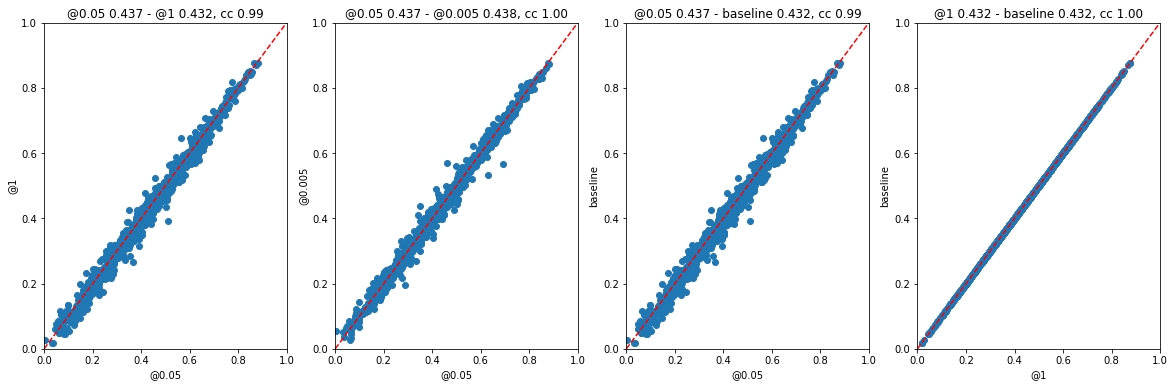

cnn_b.9_abs


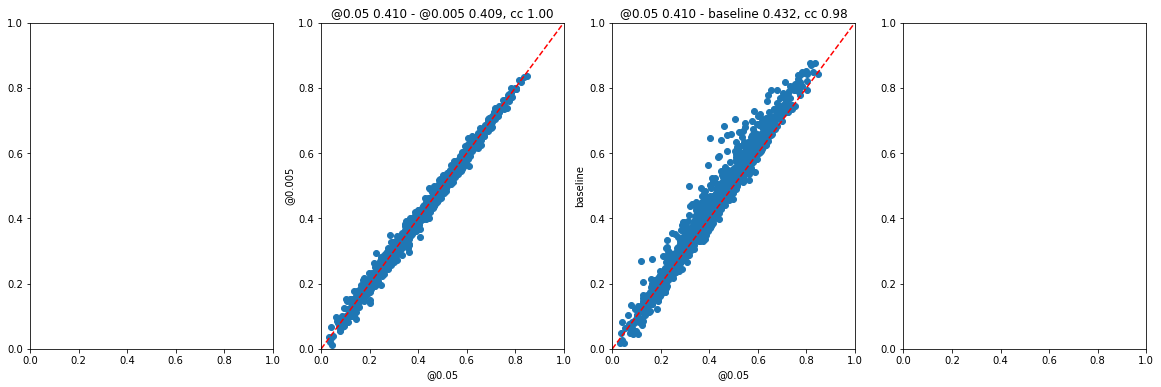

cnn_b.9_avg


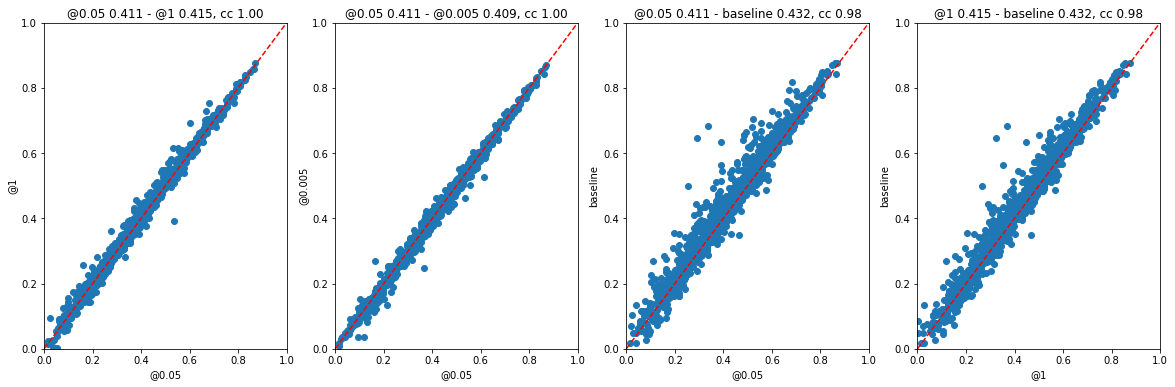

cnn_b.9_avg_abs


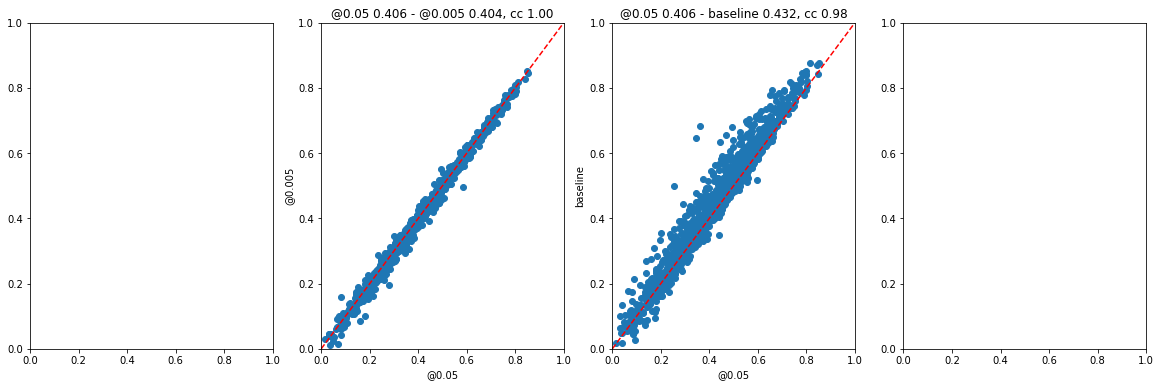

cnn_b.9_avg_halfsq


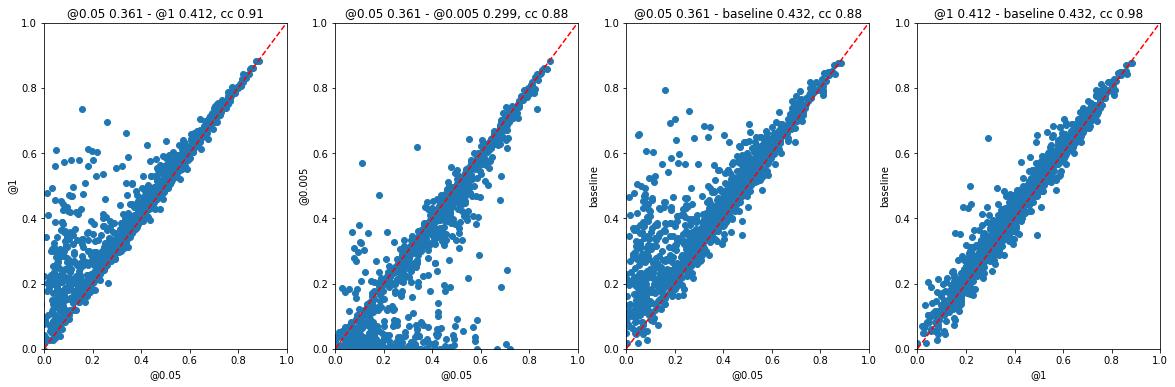

cnn_b.9_avg_linear


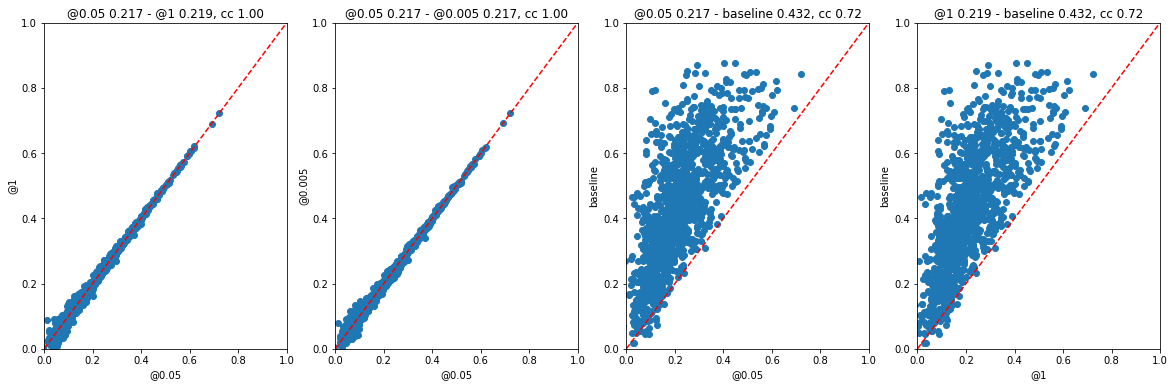

cnn_b.9_avg_sq


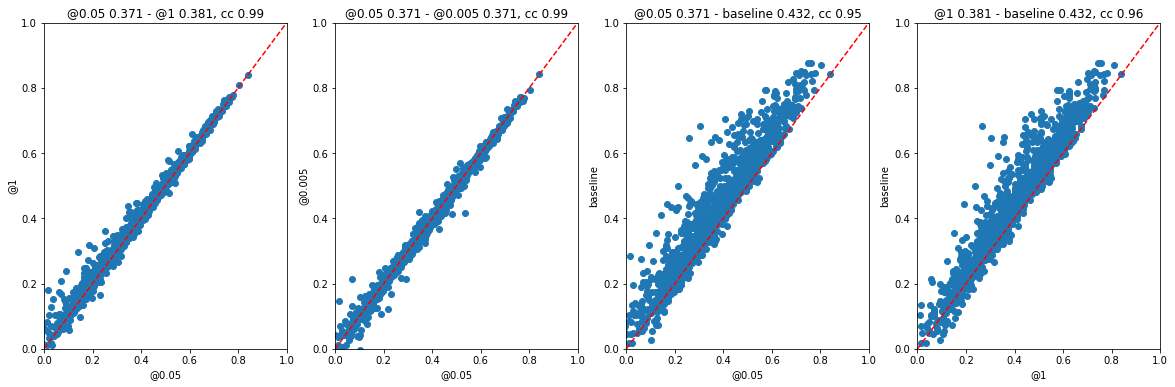

cnn_b.9_halfsq


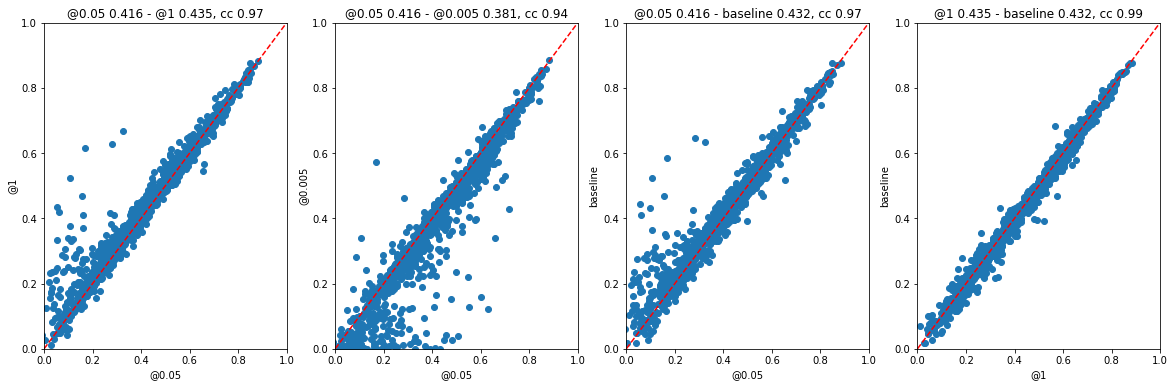

cnn_b.9_linear


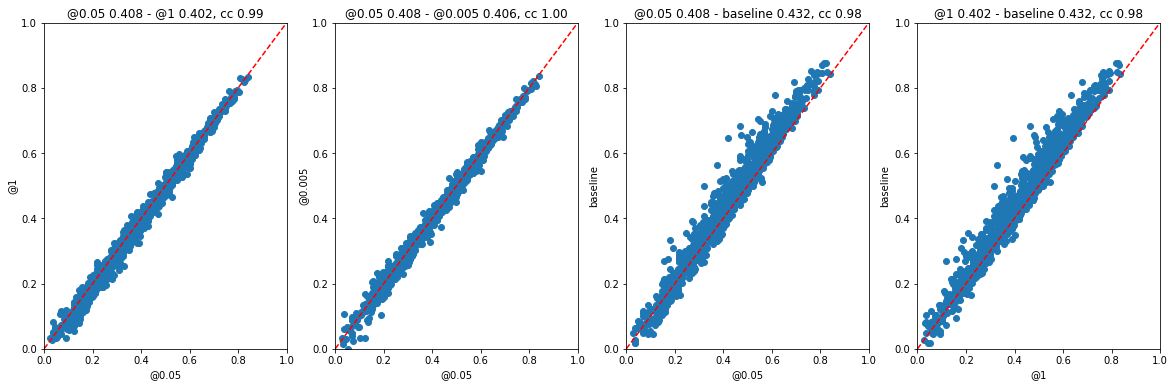

cnn_b.9_sq


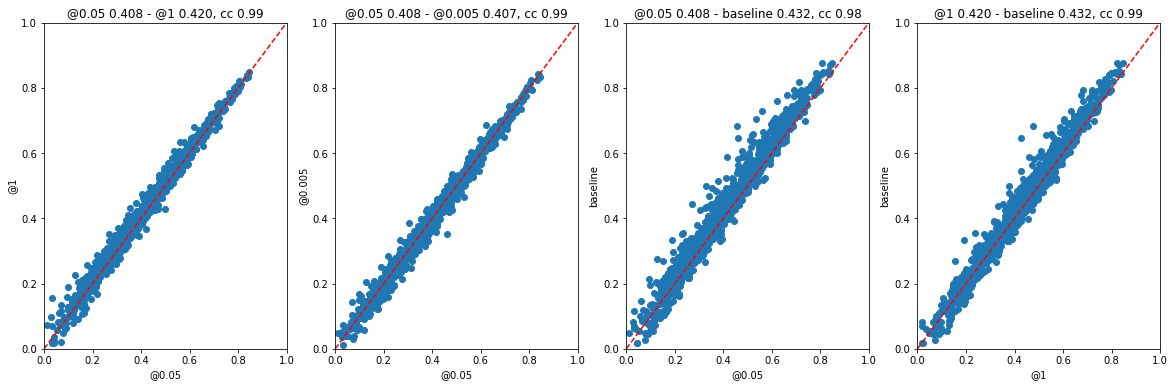

In [13]:
vis_stuff()